# Repaso (Módulo 3)
> El tema principal en este módulo fue optimización. Al finalizar este módulo, se espera que ustedes tengan las siguientes competencias
> - Realizar optimizaciones de funciones escalares en un dominio dado usando sympy.
> - Dado un problema de programación lineal, llevarlo a la forma que vimos en clase y resolverlo.
> - Ajustar curvas a conjuntos de puntos dados.
> - Diseñar clasificadores binarios con regresión logística para conjuntos de datos linealmente separables.

## Ejemplo 1. Optimización de funciones escalares usando sympy

En clase vimos cómo optimizar funciones escalares dado un invervalo cerrado finito utilizando `sympy`. Ustedes, además, realizaron una tarea donde hicieron una función genérica para optimizar cualquier función dada.

Recordamos en este ejemplo como optimizar este tipo de funciones.

### 1.1 

Obtener el máximo y el mínimo absoluto de la función

$$f(x)=2x^4-16x^3+32x^2+5$$

en el intervalo $[-1, 4.5]$. Graficar la función en este intervalo, junto con el punto donde ocurre el máximo (en color rojo) y el punto donde ocurre el mínimo (en color azul).

Les recuerdo nada más como imprimir en formato LaTeX.

In [1]:
# Librería de cálculo simbólico
import sympy as sym
# Para imprimir en formato TeX
from sympy import init_printing; init_printing(use_latex='mathjax')

¿Qué más librerías necesitamos?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

¿Qué más sigue?
- Declarar variable y función.

In [3]:
def f(x):
    return 2*x**4-16*x**3+32*x**2+5

In [4]:
sym.var('x', real = True)

x

In [5]:
f(x)

   4       3       2    
2⋅x  - 16⋅x  + 32⋅x  + 5

- Sacar derivada e igualar a cero.

In [6]:
df = sym.diff(f(x), x)
xc = sym.solve(df, x)
xc

[0, 2, 4]

- Evaluar en los extremos y en los puntos críticos.

In [7]:
f(-1), f(4.5), f(xc[0]), f(xc[1]), f(xc[2])

(55, 15.125, 5, 37, 5)

- El más grande es el máximo absoluto y el más pequeño es el mínimo absoluto. Gráfico.

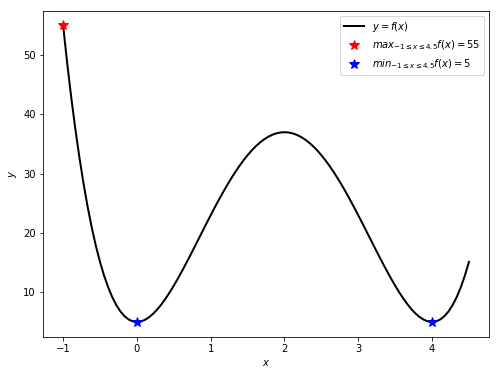

In [8]:
xnum = np.linspace(-1, 4.5, 100)

plt.figure(figsize=(8,6))
plt.plot(xnum, f(xnum), 'k', lw = 2, label = '$y=f(x)$')
plt.plot([-1], [f(-1)], '*r', ms = 10, label = '$max_{-1\leq x\leq 4.5}f(x)=55$')
plt.plot([xc[0], xc[2]], [f(xc[0]), f(xc[2])], '*b', ms = 10, label = '$min_{-1\leq x\leq 4.5}f(x)=5$')
plt.legend(loc='best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

### 1.2
Encontrar el ángulo $\theta$ que maximiza el área de un trapecio isósceles cuya base menor y segmentos laterales miden exactamente una unidad.

Graficar la función área respecto al ángulo $\theta$ en el intervalo donde tiene sentido, junto con el punto donde ocurre el máximo (en color rojo).

- Declarar variable y función.

In [9]:
def A(theta):
    return (1+sym.sin(theta))*sym.cos(theta)

In [10]:
sym.var('theta', real = True)

θ

In [11]:
A(theta)

(sin(θ) + 1)⋅cos(θ)

- Sacar derivada e igualar a cero.

In [12]:
dA = sym.diff(A(theta), theta)
dA

                          2   
-(sin(θ) + 1)⋅sin(θ) + cos (θ)

In [13]:
thetac = sym.solve(dA, theta)
thetac

⎡-π   π                ⎤
⎢───, ─, 2⋅atan(√3 + 2)⎥
⎣ 2   6                ⎦

- Evaluar en los extremos y en los puntos críticos.

In [14]:
A(0), A(thetac[1]), A(np.pi/2)

⎛   3⋅√3                      ⎞
⎜1, ────, 1.22464679914735e-16⎟
⎝    4                        ⎠

- El más grande es el máximo absoluto.

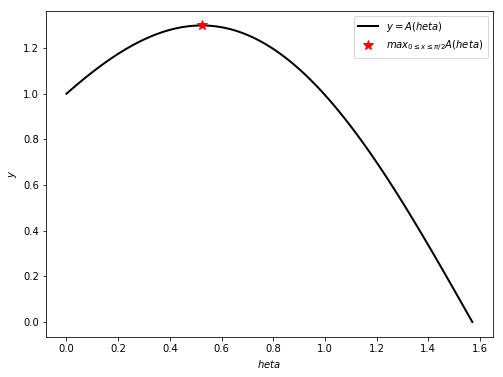

In [15]:
thetanum = np.linspace(0, np.pi/2, 100)
Anum = sym.lambdify([theta], A(theta), 'numpy')

plt.figure(figsize=(8,6))
plt.plot(thetanum, Anum(thetanum), 'k', lw = 2, label = '$y=A(\theta)$')
plt.plot([thetac[1]], [A(thetac[1])], '*r', ms = 10, label = '$max_{0\leq x\leq \pi/2}A(\theta)$')
plt.legend(loc='best')
plt.xlabel('$\theta$')
plt.ylabel('$y$')
plt.show()

___
## Ejemplo 2. Programación lineal

En clase vimos cómo llevar los problemas de programación lineal a la forma
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{f}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b}.
\end{array}
\end{equation}

Además, aprendimos a resolver los problemas en esta forma con la función `linprog` del paquete `pyomo_utilities.py`, proporcionando únicamente los parámetros $\boldsymbol{f}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario). 

### 2.1
Maximizar la función $x_1+2x_2+3x_3+4x_4+5$ sujeta a las restricciones $4x_1+3x_2+2x_3+x_4\leq10$, $x_1−x_3+2x_4=2$, $x_1+x_2+x_3+x_4\geq1$, $x_1\geq0$, $x_2\geq0$, $x_3\geq0$, $x_4\geq0$.

In [16]:
f = -np.arange(1, 5)
A = np.array([[4, 3, 2, 1], [-1, -1, -1, -1]])
A = np.concatenate((A, -np.eye(4)), axis = 0)
b = np.array([10, -1, 0, 0, 0, 0])
Aeq = np.array([[1, 0, -1, 2]])
beq = np.array([2])

In [17]:
import pyomo_utilities

In [18]:
x, obj = pyomo_utilities.linprog(f, A, b, Aeq, beq)

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -22.0
  Upper bound: -22.0
  Number of objectives: 1
  Number of constraints: 8
  Number of variables: 5
  Number of nonzeros: 16
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.018170833587646484
# ----------------------------------------------------------
#   Solution Information
# -----------------------------------

In [19]:
x

array([-0. , -0. ,  3.6,  2.8])

In [20]:
obj = -obj + 5
obj

27.0

### 2.2

Una dieta ideal debe satisfacer (o posiblemente, exceder) ciertos requerimientos nutricionales básicos al menor costo posible, ser variada y buena al paladar. ¿Cómo podemos formular dicha dieta?

Suponga que solo tenemos acceso a las siguientes comidas:

In [21]:
import pandas as pd

In [22]:
df = pd.DataFrame(columns=['Energia', 'Proteina', 'Calcio', 'Precio', 'Limite_diario'], index=['Avena', 'Pollo', 'Huevos', 'Leche', 'Pastel', 'Frijoles_cerdo'])
df.loc[:,'Energia']=[110, 205, 160, 160, 420, 260]
df.loc[:,'Proteina']=[4, 32, 13, 8, 4, 14]
df.loc[:,'Calcio']=[2, 12, 54, 285, 22, 80]
df.loc[:,'Precio']=[3, 24, 13, 9, 20, 19]
df.loc[:,'Limite_diario']=[4, 3, 2, 8, 2, 2]

df

,Energia,Proteina,Calcio,Precio,Limite_diario
Avena,110,4,2,3,4
Pollo,205,32,12,24,3
Huevos,160,13,54,13,2
Leche,160,8,285,9,8
Pastel,420,4,22,20,2
Frijoles_cerdo,260,14,80,19,2


Luego de consultar expertos en nutrición tenemos que una dieta satisfactoria tiene por lo menos $2000$ kcal de energía, $55$ g de proteina, y $800$ mg de calcio.

Para imponer la variedad se ha decidido limitar el número de porciones diarias de cada una de las comidas como se indica en la tabla.

In [23]:
f = np.array(df.loc[:,'Precio'])
A = -np.array([df.loc[:,'Energia'], df.loc[:,'Proteina'], df.loc[:,'Calcio']])
A = np.concatenate((A, np.eye(6)), axis = 0)
A = np.concatenate((A, -np.eye(6)), axis = 0)
b = np.array([-2000, -55, -800])
b = np.concatenate((b, df.loc[:,'Limite_diario']))
b = np.concatenate((b, np.zeros((6,))))

In [24]:
x, obj = pyomo_utilities.linprog(f, A, b)

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 92.5
  Upper bound: 92.5
  Number of objectives: 1
  Number of constraints: 16
  Number of variables: 7
  Number of nonzeros: 31
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.01710057258605957
# ----------------------------------------------------------
#   Solution Information
# -------------------------------------

In [25]:
x

array([ 4. , -0. , -0. ,  4.5,  2. , -0. ])

In [26]:
obj

92.5

## Ejemplo 3. Ajuste de curvas

El archivo `forest_mex.csv` contiene información histórica anual del porcentaje de área forestal de México. La primer columna corresponde a los años y la segunda corresponde al porcentaje de área forestal.

Tomado de: https://data.worldbank.org/indicator/AG.LND.FRST.ZS?view=chart.

Usando los años como variable independiente $x$ y la el porcentaje de área forestal como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

Mostrar en un solo gráfico los datos de porcentaje de área forestal contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

Con los polinomios ajustados en el punto anterior, estime el año en que México quedará sin area forestal (suponiendo que todo sigue igual).

## Ejemplo 4. Clasificador binario

Hasta ahora hemos visto como diseñar clasificadores binarios dados un conjunto de entrenamiento. Sin embargo, no le hemos dado uso.

Después del diseño de un clasificador, lo que sigue es entregarle datos de entrada y que él los clasifique.

Para los datos de la tarea de clasificación binaria, diseñaremos un clasificador binario por regresión logística lineal utilizando únicamente los primeros 80 datos.

Luego, usaremos el clasificador diseñado para clasificar a los 20 datos restantes. ¿Cuántos datos se clasifican bien? ¿Cuántos mal?

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>